In [6]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np 
import mysql.connector

### Pre

In [7]:

config = {
  'user': 'root',
  'password': 'root',
  'host': 'localhost',
  "port": 3306,
  'database': 'sdd4',
  'raise_on_warnings': True
}

bdd = mysql.connector.connect(**config)

In [8]:
def window_data(df:pd.DataFrame):
    x = []
    y = [] 
    for i in range(len(df)-1):
        x.append(df.iloc[i])
        y.append(df.iloc[i + 1])

    return x,y

In [9]:
def plot_corr(df:pd.DataFrame) -> None: 
    plt.figure(figsize=(15,8))
    sns.heatmap(df.corr(),annot=True, fmt=".2f", cmap="coolwarm")
    plt.xticks(fontsize=8)  
    plt.yticks(fontsize=8)
    plt.show()

def plot_linear(df):
    x,y = window_data(df)
    plt.figure(figsize=(15,8))
    plt.plot(x,y,"o")
    plt.xlabel(f"{df.name} Times: t")
    plt.ylabel(f"{df.name} Times: t+1")

    plt.show()

### 1.Inflation 

In [10]:
cursor = bdd.cursor()
cursor.execute("SELECT * FROM inflation")
columns = [col[0] for col in cursor.description]
inflation = pd.DataFrame(cursor.fetchall(),columns=columns)
inflation["observation_date"] = pd.to_datetime(inflation["observation_date"])
inflation["CPI"] = inflation["CPI"].map(lambda x: float(x))
inflation = inflation.set_index("idI")
inflation

,observation_date,CPI
idI,,
1,1913-01-01,9.800
2,1913-02-01,9.800
3,1913-03-01,9.800
4,1913-04-01,9.800
5,1913-05-01,9.800
...,...,...
1293,2020-09-01,257.971
1294,2020-10-01,257.971
1295,2020-11-01,257.971


In [11]:
inflation.describe()

,observation_date,CPI
count,1297,1297.000000
mean,1966-12-31 10:16:11.472630,80.459403
min,1913-01-01 00:00:00,9.800000
25%,1940-01-01 00:00:00,17.400000
50%,1967-01-01 00:00:00,32.900000
75%,1994-01-01 00:00:00,146.200000
max,2021-01-01 00:00:00,261.582000
std,NaN,78.447433


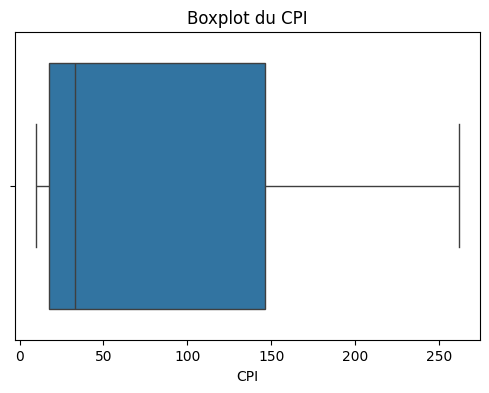

In [12]:
plt.figure(figsize=(6,4))
sns.boxplot(x=inflation["CPI"])
plt.title("Boxplot du CPI")
plt.show()

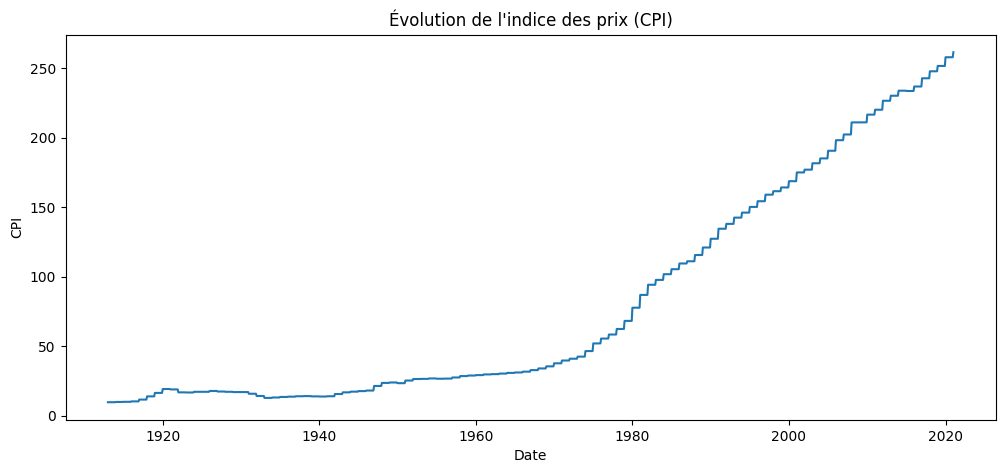

In [13]:
plt.figure(figsize=(12,5))
plt.plot(inflation["observation_date"], inflation["CPI"])
plt.title("Évolution de l'indice des prix (CPI)")
plt.xlabel("Date")
plt.ylabel("CPI")
plt.show()

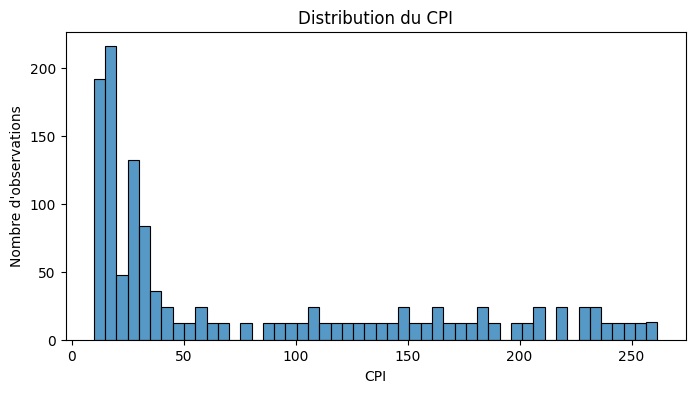

In [14]:

plt.figure(figsize=(8,4))
sns.histplot(inflation["CPI"], bins=50)
plt.title("Distribution du CPI")
plt.ylabel("Nombre d'observations")
plt.show()

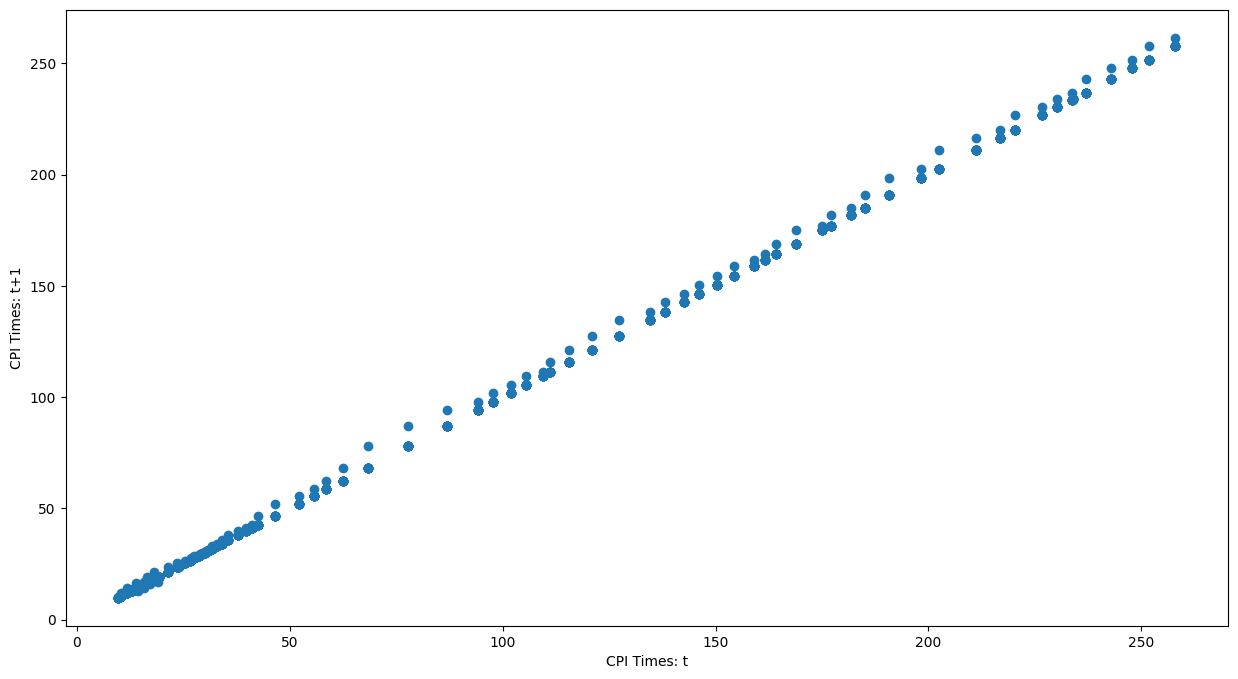

In [15]:
plot_linear(inflation["CPI"])

### 2. Table StandarAndPoor

In [16]:
cursor = bdd.cursor()
cursor.execute("SELECT * FROM standardandpoor")
columns = [col[0] for col in cursor.description]
df = pd.DataFrame(cursor.fetchall(),columns = columns)
df = df.set_index("idSP")


In [17]:
df

,observation_date,sp500,dividend,earnings,longInterestRate,realPrice,realDividend,realEarnings
idSP,,,,,,,,
2,1871-01-01,4.515,0.26,0.40,5.335,111.325,6.41,9.86
3,1871-02-01,4.500,0.26,0.40,5.320,107.250,6.20,9.53
4,1871-03-01,4.610,0.26,0.40,5.330,108.270,6.11,9.39
5,1871-04-01,4.740,0.26,0.40,5.330,115.540,6.34,9.75
6,1871-05-01,4.860,0.26,0.40,5.330,121.220,6.48,9.98
...,...,...,...,...,...,...,...,...
1830,2023-05-01,4146.170,68.54,179.17,3.570,4173.450,68.99,180.35
1831,2023-06-01,4345.370,68.71,181.17,3.750,4359.880,68.94,181.77
1832,2023-07-01,4508.080,68.71,181.17,3.900,4514.510,68.94,181.77


In [18]:
df.describe()

,sp500,dividend,earnings,longInterestRate,realPrice,realDividend,realEarnings
count,1833.000000,1833.000000,1833.000000,1833.000000,1833.000000,1833.000000,1833.000000
mean,377.524667,7.592422,17.879746,4.489225,744.212207,20.331803,41.425355
std,809.035051,13.876536,35.217780,2.300872,915.492443,13.650793,38.049710
min,2.730000,0.180000,0.160000,0.620000,82.870000,6.110000,5.130000
25%,8.010000,0.420000,0.575000,3.150000,210.600000,10.580000,15.910000
50%,18.250000,0.930000,1.550000,3.800000,324.810000,16.230000,26.980000
75%,184.900000,7.770000,15.010000,5.100000,812.870000,25.770000,50.030000
max,4674.770000,68.710000,197.910000,15.320000,5140.590000,71.220000,217.260000


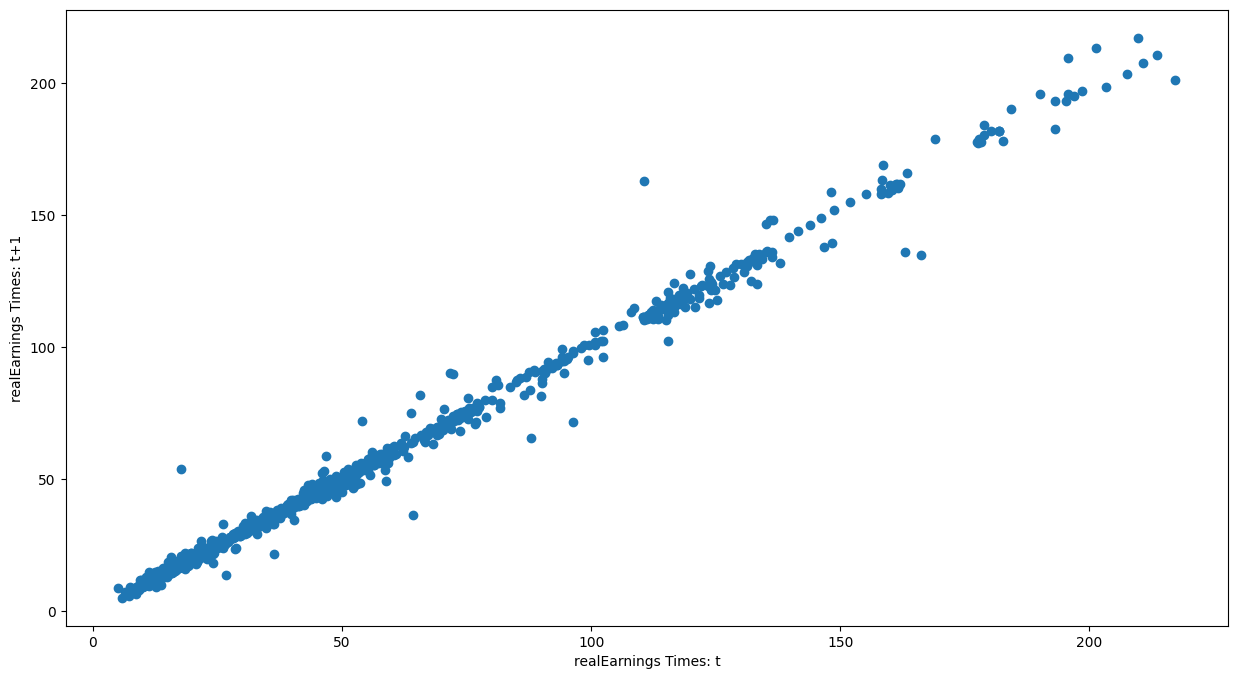

In [19]:
plot_linear(df["realEarnings"])



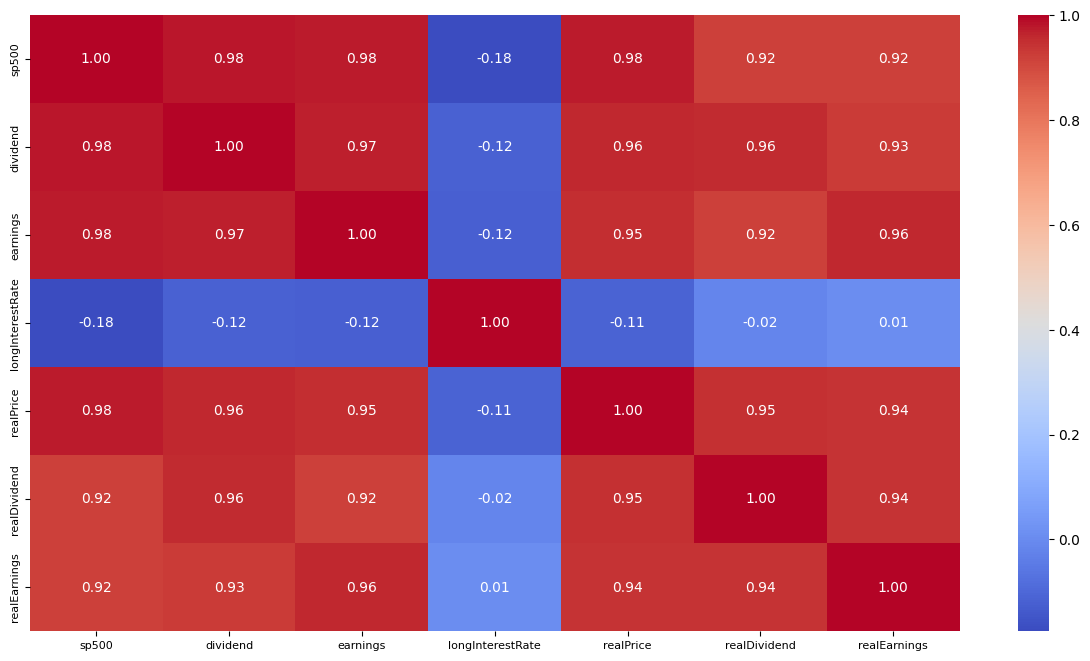

In [20]:
plot_corr(df.iloc[:, 1:])